In [1]:
# Import neuprint wrapper by navis
import navis.interfaces.neuprint as neu

In [2]:
client = neu.Client('https://neuprint.janelia.org/')

In [6]:
mbons, roi_info = neu.fetch_neurons(neu.SegmentCriteria(instance='.*MBON.*', regex=True))
mbons.head(3)

,bodyId,instance,type,cellBodyFiber,pre,post,size,status,cropped,statusLabel,somaRadius,somaLocation,roiInfo,inputRois,outputRois
0,300972942,MBON14(a3)_R,MBON14,NaN,543,13634,1563154937,Traced,False,Roughly traced,NaN,None,"{'MB(R)': {'pre': 17, 'post': 13295}, 'aL(R)':...","[MB(+ACA)(R), MB(R), SIP(R), SLP(R), SMP(R), S...","[MB(+ACA)(R), MB(R), SIP(R), SLP(R), SMP(R), S..."
1,394225044,MBON14(a3)_L,MBON14,NaN,175,4901,351913412,Traced,False,Roughly traced,NaN,None,"{'MB(L)': {'pre': 173, 'post': 4872}, 'aL(L)':...","[MB(L), SIP(L), SNP(L), aL(L)]","[MB(L), SIP(L), SNP(L), aL(L)]"
2,422725634,MBON06(B1>a)(AVM07)_L,MBON06,NaN,1356,20978,3118269136,Traced,False,Roughly traced,NaN,None,"{'MB(R)': {'pre': 777, 'post': 20368}, 'aL(R)'...","[CRE(-ROB,-RUB)(R), CRE(R), INP, MB(+ACA)(R), ...","[CRE(-ROB,-RUB)(R), CRE(R), INP, MB(+ACA)(R), ..."


In [12]:
mb = neu.fetch_roi('MB(R)')
mb

<class 'navis.core.volumes.Volume'> "MB(R)" at 0x1259bfa20: 115835 vertices, 231712 faces

In [9]:
mbon_skeletons = neu.fetch_skeletons(neu.SegmentCriteria(instance='.*MBON.*', regex=True))
mbon_skeletons.head()

,n_branches,n_nodes,id,n_connectors,n_leafs,name,type,soma,cable_length
0,2297,22834,300972942,62609,2369,None,TreeNeuron,NaN,7.582317e+05
1,1133,11863,394225044,11234,1155,None,TreeNeuron,NaN,2.960400e+05
2,4111,34795,422725634,110299,4213,None,TreeNeuron,NaN,1.397182e+06
3,1200,14172,423382015,32419,1226,None,TreeNeuron,2354.0,4.493329e+05
4,543,6932,423774471,10760,557,None,TreeNeuron,1777.0,2.461311e+05


In [18]:
import navis

# Make a 3D plot
fig = navis.plot3d([mbon_skeletons[0], mb])

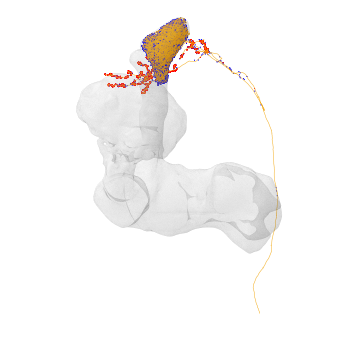

In [21]:
# Make a 2d plot
fig, ax = navis.plot2d([mbon_skeletons[0], mb], method='3d', connectors=True)

# Rotate to frontal view
ax.elev = -90
ax.azim = -90
ax.dist = 5